# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Change Working Directory to where the data file resides

In [2]:
os.chdir("C:\\users\\kumarma\\My Codebase\\git\\Boston Housing")
df=pd.read_csv("data.csv")

# Inspect the data in general and do some pre-processing activities

This includes:
1. checking the shape i.e. Number of rows and columns for the data
2. Checking for Null Values

In [3]:
df.shape

(506, 14)

In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
print("Null Values")
for cols in df.columns:
    null_count=df[cols].isnull().sum()
    print(cols + " : " + str(null_count))

Null Values
CRIM : 0
ZN : 0
INDUS : 0
CHAS : 0
NOX : 0
RM : 0
AGE : 0
DIS : 0
RAD : 0
TAX : 0
PTRATIO : 54
B : 0
LSTAT : 0
MEDV : 0


# PTRATIO field needs to be treated for NULL values as there exist 54 such records.
Replacing them with Mean value of the same column

In [7]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(df.iloc[:,10:11])
df.iloc[:,10:11]=imputer.transform(df.iloc[:,10:11])

In [8]:
print("Null Values")
for cols in df.columns:
    null_count=df[cols].isnull().sum()
    print(cols + " : " + str(null_count))

Null Values
CRIM : 0
ZN : 0
INDUS : 0
CHAS : 0
NOX : 0
RM : 0
AGE : 0
DIS : 0
RAD : 0
TAX : 0
PTRATIO : 0
B : 0
LSTAT : 0
MEDV : 0


# Selecting the independent and Dependent variables
All fields strating from CRIM to LSTAT are independent variables, and the one on the right most i.e. MEDV is the dependent variable.

In [7]:
x=df.iloc[:,0:13]
y=df.iloc[:,13]

In [8]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

# Creating the Training Set and the Test Set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0 )

In [11]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
245,0.19133,22.0,5.86,0.000,0.431,5.605,70.2000,7.9549,7,330.0,19.100000,389.13,18.46
59,0.10328,25.0,5.13,0.000,0.453,5.927,47.2000,6.9320,8,284.0,19.700000,396.90,9.22
276,0.10469,40.0,6.41,1.000,0.447,7.267,49.0000,4.7872,4,254.0,17.600000,389.25,6.05
395,8.71675,0.0,18.10,0.000,0.693,6.471,98.8000,1.7257,24,666.0,20.200000,391.98,17.12
416,0.00000,18.1,0.00,0.679,6.782,90.800,1.8195,24.0000,666,20.2,18.247124,21.57,25.79


In [12]:
y_train.head()

245    18.5
59     19.6
276    33.2
395    13.1
416     7.5
Name: MEDV, dtype: float64

# Building a Linear Regression Model and predicting the values of MEDV field

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred=regressor.predict(x_test)

In [15]:
regressor.coef_

array([  5.32496547e-02,   6.41432576e-02,  -1.46003279e-01,
         2.89203201e+00,  -4.27132968e+00,   1.66718931e-01,
         4.88248860e-03,  -1.58201145e+00,   4.93646096e-02,
        -5.87785600e-03,  -8.94731041e-01,   3.43875022e-03,
        -8.44333554e-01])

In [16]:
regressor.intercept_

58.00696835444527

In [17]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R-Squared = " + str(r2))

R-Squared = 0.530666653775


R-Squared for the linear regression model comes out to be 0.53 which means that all the independent variables put together only explain ~53% of the dependent variable MEDV.

To improve the predictability of this linear model we will need to apply Feature Selection technique to only select the features that explain the dependent variable considerably and leave out the rest.

First of all trying to implement Feature Selection method using Filtering method (which inherently uses Pearson Corelation co-efficient)

In [18]:
corr1=df.corr()
print(corr1)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.288969  0.586719 -0.067536 -0.139448 -0.185045  0.462470   
ZN      -0.288969  1.000000 -0.491587 -0.005843  0.038450  0.078721 -0.488006   
INDUS    0.586719 -0.491587  1.000000 -0.185873 -0.394483 -0.448809  0.700699   
CHAS    -0.067536 -0.005843 -0.185873  1.000000  0.585243  0.585447 -0.269616   
NOX     -0.139448  0.038450 -0.394483  0.585243  1.000000  0.975767 -0.550065   
RM      -0.185045  0.078721 -0.448809  0.585447  0.975767  1.000000 -0.595786   
AGE      0.462470 -0.488006  0.700699 -0.269616 -0.550065 -0.595786  1.000000   
DIS     -0.312843  0.268317 -0.605973  0.523772  0.923503  0.946946 -0.744068   
RAD     -0.151996  0.062767 -0.427834  0.587673  0.985957  0.992620 -0.585574   
TAX      0.754362 -0.256799  0.748951 -0.347552 -0.570346 -0.610962  0.635697   
PTRATIO  0.314074 -0.363174  0.284308 -0.080543  0.006757 -0.007736  0.154933   
B       -0.211774  0.076344 

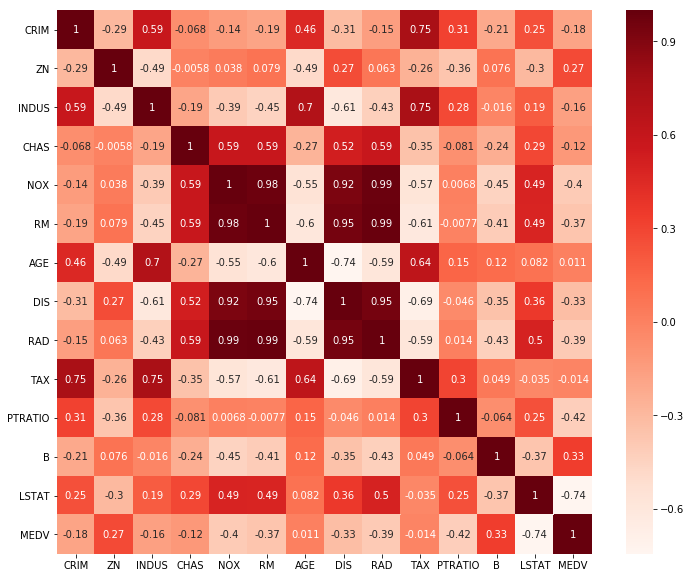

In [19]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
cols = abs(cor["MEDV"])
selected_features = cols[cols>0.5]
print(selected_features)

LSTAT    0.737663
MEDV     1.000000
Name: MEDV, dtype: float64


What I found here is that the feature LSTAT has a very high co-relation co-efficient for MEDV. This could be the feature that explains the dependent variable the most. I will need to find out by creating another linear regression model using just LSTAT as the independent variable and MEDV as the dependent variable.

In [21]:
x=df.iloc[:,12:13]
y=df.iloc[:,13]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0 )

In [23]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_pred1=regressor.predict(x_test)

In [25]:
r2=r2_score(y_test,y_pred1)
print(r2)

0.457639361556


What we observe here is that feature selection using the filtering method resulted in even lower R-squared values. So, this model is worse in comparison to the one we created without applying feature selection technique.

Feature selection using Backwars Elimination method: Using R-Squared, Adj R-Squared values and P-Value.

In [26]:
x=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
y=df.iloc[:,13]

In [27]:
import statsmodels.formula.api as sm
x=np.append(arr=np.ones((506,1)).astype(int),values=x,axis=1)
x_opt=x[:,[0,2,3,4,5,6,8,12]]
regressor_ols=sm.OLS(endog=y,exog=x_opt).fit()

In [28]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     48.97
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           7.50e-53
Time:                        17:04:16   Log-Likelihood:                -1707.7
No. Observations:                 506   AIC:                             3431.
Df Residuals:                     498   BIC:                             3465.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2994      2.035     14.890      0.000      26.301      34.297
x1             0.1240      0.018      6.888      0.000       0.089       0.159
x2            -0.6466      0.068     -9.489      0.000      -0.780      -0.513
x3             5.1226      1.266      4.048      0.000       2.636       7.609
x4            -0.2683      0.953     -0.282      0.778      -2.140       1.603
x5             0.1906      0.066      2.894      0.004       0.061       0.320
x6            -1.7847      0.223     -7.993      0.000      -2.223      -1.346
x7             0.0116      0.004      2.896      0.004       0.004       0.019
==============================================================================
Omnibus:                      151.223   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.571
Skew:                           1.482   Prob(JB):                     7.69e-87
Kurtosis:                       6.166   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
regressor_ols.pvalues

const    9.611517e-42
x1       1.716770e-11
x2       9.604785e-20
x3       5.992328e-05
x4       7.783119e-01
x5       3.973291e-03
x6       9.272671e-15
x7       3.947465e-03
dtype: float64

In [30]:
x=df.iloc[:,[0,2,3,4,5,6,8,12]]
y=df.iloc[:,13]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0 )
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [32]:
r2=r2_score(y_test,y_pred)
print(r2)

0.520440708106


check for multicollinearity

In [33]:
x.corr()

,CRIM,INDUS,CHAS,NOX,RM,AGE,RAD,LSTAT
CRIM,1.000000,0.586719,-0.067536,-0.139448,-0.185045,0.462470,-0.151996,0.250337
INDUS,0.586719,1.000000,-0.185873,-0.394483,-0.448809,0.700699,-0.427834,0.194509
CHAS,-0.067536,-0.185873,1.000000,0.585243,0.585447,-0.269616,0.587673,0.287212
NOX,-0.139448,-0.394483,0.585243,1.000000,0.975767,-0.550065,0.985957,0.490864
RM,-0.185045,-0.448809,0.585447,0.975767,1.000000,-0.595786,0.992620,0.485595
AGE,0.462470,0.700699,-0.269616,-0.550065,-0.595786,1.000000,-0.585574,0.081914
RAD,-0.151996,-0.427834,0.587673,0.985957,0.992620,-0.585574,1.000000,0.499727
LSTAT,0.250337,0.194509,0.287212,0.490864,0.485595,0.081914,0.499727,1.000000


Checking for Multicollinearilty

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [35]:
vif

,VIF Factor,features
0,2.148947,CRIM
1,6.934518,INDUS
2,1.884903,CHAS
3,47.227409,NOX
4,70.254527,RM
5,10.435292,AGE
6,95.778386,RAD
7,8.388358,LSTAT


# Applying Support Vector Regression Technique
This technique is not so commonly used and so it does not automatically auto-scale.
Scaling needs to be specifically applied to the data set for applying SVR technique.

# Applying Random Forest Regression Technique

In [46]:
x=df.iloc[:,[0,2,3,6,8,12]]
y=df.iloc[:,13]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0 )
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [48]:
r2=r2_score(y_test,y_pred)
print(r2)

0.663312709948


What we see above is that after treating for multicollinearity, even the accuracy of multiple linear regression model increased.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [50]:
vif

,VIF Factor,features
0,1.903824,CRIM
1,6.742426,INDUS
2,1.882329,CHAS
3,7.658880,AGE
4,4.103643,RAD
5,8.110726,LSTAT


In [55]:
from sklearn.ensemble import RandomForestRegressor

for i in range(1, 26):
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
    regressor.fit(x, y)
    y_pred=regressor.predict(x_test)
    r2=r2_score(y_test,y_pred)
    print('Estimators = ' + str(i) + ', R2 = ' + str(r2))

Estimators = 1, R2 = 0.863742832196
Estimators = 2, R2 = 0.88642966696
Estimators = 3, R2 = 0.893496116233
Estimators = 4, R2 = 0.924744807162
Estimators = 5, R2 = 0.928635056079
Estimators = 6, R2 = 0.937517159518
Estimators = 7, R2 = 0.948264507929
Estimators = 8, R2 = 0.950460755644
Estimators = 9, R2 = 0.953003701139
Estimators = 10, R2 = 0.956001464416
Estimators = 11, R2 = 0.958180577679
Estimators = 12, R2 = 0.957549373818
Estimators = 13, R2 = 0.956271193501
Estimators = 14, R2 = 0.950620570525
Estimators = 15, R2 = 0.952042121599
Estimators = 16, R2 = 0.954330722703
Estimators = 17, R2 = 0.956043615967
Estimators = 18, R2 = 0.95599696883
Estimators = 19, R2 = 0.95854587173
Estimators = 20, R2 = 0.955593773282
Estimators = 21, R2 = 0.956064874062
Estimators = 22, R2 = 0.957551923249
Estimators = 23, R2 = 0.958408198579
Estimators = 24, R2 = 0.958350153029
Estimators = 25, R2 = 0.958316353728


In [56]:
res=pd.DataFrame()

In [57]:
res['Actual Values']=y_test
res['Predicted Values']=y_pred
print(res)

     Actual Values  Predicted Values
329           22.6            23.712
371           50.0            44.656
219           23.0            22.068
403            8.3            10.356
78            21.2            20.940
15            19.9            20.320
487           20.6            21.212
340           18.7            19.868
310           16.1            18.268
102           18.6            19.496
418            8.8             8.824
411           17.2            16.324
446           14.9            14.528
386           10.5             9.936
162           50.0            49.336
299           29.0            28.528
480           23.0            22.432
196           33.3            35.988
175           29.4            28.676
37            21.0            21.216
320           23.8            23.900
171           19.1            18.800
107           20.4            20.148
278           29.1            27.600
45            19.3            19.988
367           23.1            19.228
2